In [1]:
from DatagenClassification import TFClassificationDataGenerator

In [2]:
from matplotlib import pyplot as plt
import random
import albumentations as A
%matplotlib inline

In [3]:
random.seed(47)

In [4]:
train_files = ['../../data/coco_person_classification_tiny/train_class-00000-of-00005', 
               '../../data/coco_person_classification_tiny/train_class-00001-of-00005', 
               '../../data/coco_person_classification_tiny/train_class-00002-of-00005', 
               '../../data/coco_person_classification_tiny/train_class-00003-of-00005', 
               '../../data/coco_person_classification_tiny/train_class-00004-of-00005']
val_files = ['../../data/coco_person_classification_tiny/val_class-00000-of-00005', 
             '../../data/coco_person_classification_tiny/val_class-00001-of-00005', 
             '../../data/coco_person_classification_tiny/val_class-00002-of-00005', 
             '../../data/coco_person_classification_tiny/val_class-00003-of-00005', 
             '../../data/coco_person_classification_tiny/val_class-00004-of-00005']
has_bg = True

In [5]:
train_transform = A.Compose([
        A.Rotate(limit=180),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=0, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])

In [6]:
val_transform = A.Compose([
        A.Rotate(limit=180),
        A.Flip(),
#         A.ToGray(0.2),
    ])

In [9]:
df_gen = TFClassificationDataGenerator(train_files=train_files,
                                       val_files=val_files,
                                       num_classes=3,
                                       train_size=2000,
                                       val_size=2000,
                                       train_aug=None,
                                       val_aug=None,
                                       repeatds=False
                                      )

In [10]:
train_gen = df_gen.validation_generator(1)

In [11]:
ctr = 0
for _ in train_gen:
    ctr += 1
print(ctr)

2058


In [20]:
def view_image(ds, num_samples=5):
    image = []
    label = []
    for _ in range(num_samples):
        i, l = next(iter(ds)) # extract 1 batch from the dataset
        print(i.shape, l.shape)
        image.append(i.numpy()[0])
        label.append(l.numpy()[0])
        print(l.numpy())

    fig = plt.figure(figsize=(22, 22))
    for i in range(num_samples):
        ax = fig.add_subplot(num_samples//5, 5, i+1, xticks=[], yticks=[])
        ax.imshow(image[i])
        ax.set_title(f"Label: {str(label[i])}")

(1, 453, 640, 3) (1, 3)
[[1. 0. 0.]]
(1, 480, 640, 3) (1, 3)
[[0. 1. 0.]]
(1, 480, 640, 3) (1, 3)
[[0. 1. 0.]]
(1, 480, 640, 3) (1, 3)
[[1. 0. 0.]]
(1, 612, 612, 3) (1, 3)
[[0. 1. 0.]]
(1, 480, 640, 3) (1, 3)
[[0. 1. 0.]]
(1, 333, 500, 3) (1, 3)
[[1. 0. 0.]]
(1, 480, 640, 3) (1, 3)
[[0. 1. 0.]]
(1, 480, 640, 3) (1, 3)
[[0. 1. 0.]]
(1, 480, 640, 3) (1, 3)
[[0. 1. 0.]]
(1, 504, 640, 3) (1, 3)
[[0. 1. 0.]]
(1, 426, 640, 3) (1, 3)
[[1. 0. 0.]]
(1, 480, 640, 3) (1, 3)
[[0. 1. 0.]]
(1, 480, 640, 3) (1, 3)
[[0. 1. 0.]]
(1, 480, 640, 3) (1, 3)
[[0. 1. 0.]]
(1, 480, 640, 3) (1, 3)
[[1. 0. 0.]]
(1, 428, 640, 3) (1, 3)
[[1. 0. 0.]]
(1, 480, 640, 3) (1, 3)
[[0. 1. 0.]]
(1, 480, 640, 3) (1, 3)
[[1. 0. 0.]]
(1, 480, 640, 3) (1, 3)
[[1. 0. 0.]]


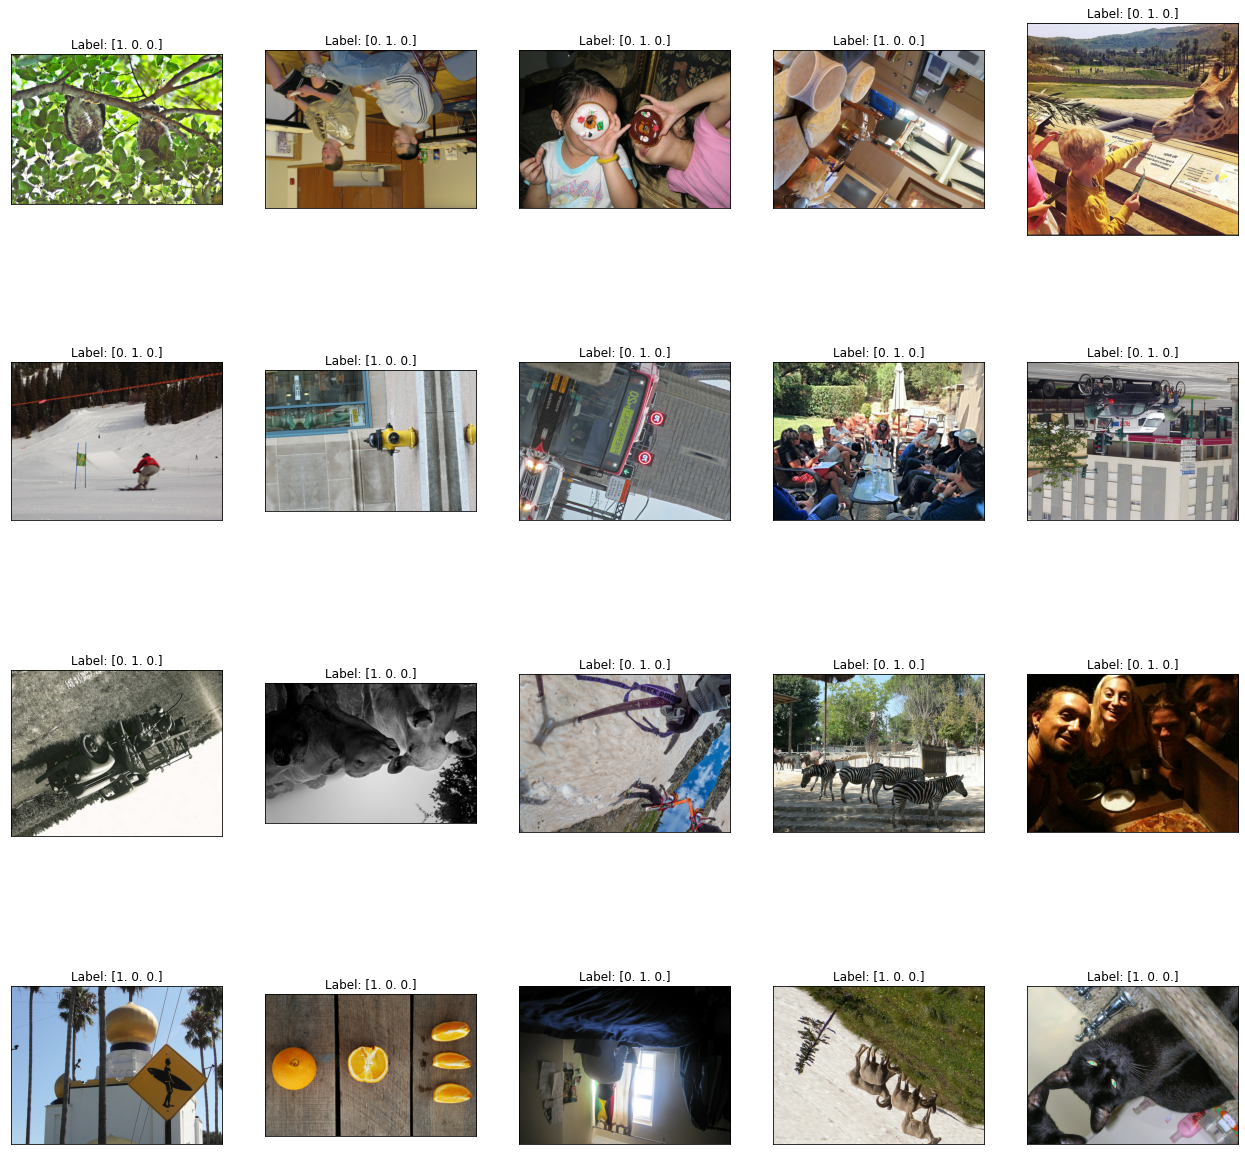

In [21]:
view_image(train_gen, num_samples=20)

In [16]:
import tensorflow as tf

In [25]:
def get_data_generator(ds, n_batches):
    """Get a generator returning n_batches random data of batch_size with n_features."""

    def data_generator():
        for _ in range(n_batches):
            x, y = next(iter(ds))
            yield x, y

    return data_generator

In [27]:
dataset = tf.data.Dataset.from_generator(
    get_data_generator(train_gen, 3),
    output_types=(tf.float32, tf.uint8),
    output_shapes=((1, None, None, 3), (1, 3)),
).batch(1)

In [28]:

list(dataset.take(3).as_numpy_iterator())


[(array([[[[[200., 202., 201.],
            [200., 202., 201.],
            [202., 204., 203.],
            ...,
            [245., 245., 243.],
            [245., 245., 243.],
            [244., 244., 242.]],
  
           [[207., 208., 210.],
            [205., 206., 208.],
            [198., 200., 199.],
            ...,
            [243., 243., 241.],
            [244., 244., 242.],
            [248., 248., 246.]],
  
           [[204., 205., 209.],
            [202., 203., 205.],
            [203., 204., 206.],
            ...,
            [237., 237., 235.],
            [248., 248., 246.],
            [245., 245., 243.]],
  
           ...,
  
           [[ 29.,  12.,   5.],
            [ 37.,  18.,  11.],
            [ 40.,  17.,   9.],
            ...,
            [111.,  95.,  70.],
            [104.,  90.,  63.],
            [112., 103.,  72.]],
  
           [[ 40.,  19.,  14.],
            [ 41.,  17.,   7.],
            [ 51.,  21.,  11.],
            ...,
            [188